# Import & Loading Data Frames

In [2]:
!pip install tensorflow-gpu
!pip install plotly
!pip install nbformat
!pip install nltk
!pip install spacy
!pip install WordCloud
!pip install gensim




# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Import our metrics to evaluate our model
from sklearn import metrics

# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')
stopwords.extend(['from','subject','re','edu'])

nltk.download('punkt')

import tensorflow as tf
import numpy as np 

from wordcloud import WordCloud, STOPWORDS

import gensim
from gensim.utils import simple_preprocess 
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omiah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omiah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omiah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omiah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
# load data

df_true = pd.read_csv("data/True.csv")
df_fake = pd.read_csv("data/Fake.csv")

In [4]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17


In [6]:
df_true.isnull()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
21412,False,False,False,False
21413,False,False,False,False
21414,False,False,False,False
21415,False,False,False,False


In [7]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [10]:
# get a count of all the subjects 

df_fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [11]:
df_true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

# Feature Engineering

In [12]:
df_true['isfake']= 'fake'
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,fake
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,fake
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,fake
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,fake
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,fake


In [13]:
df_fake['isfake'] = 'true'
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",true
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",true
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",true
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",true
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",true


In [14]:
# concatenation of both data frames 

df_concat = pd.concat([df_true, df_fake]).reset_index(drop = True)
df_concat

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,fake
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,fake
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,fake
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,fake
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,fake
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",true
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",true
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",true
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",true


In [15]:
df_concat.drop(columns=['date'], inplace = True)

In [16]:
df_concat

,title,text,subject,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,fake
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,fake
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,fake
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,fake
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,fake
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,true
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,true
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,true
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,true


In [17]:
df_concat['original'] = df_concat['title'] + ' ' + df_concat['text']
df_concat

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,fake,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,fake,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,fake,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,fake,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,fake,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,true,McPain: John McCain Furious That Iran Treated ...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,true,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,true,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,true,How to Blow $700 Million: Al Jazeera America F...


In [18]:
df_concat['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [19]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Functions for preprocessing

In [20]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) < 3 and token not in stopwords:
            result.append(token)
    return result



In [21]:
# lower case 
def to_lower(document): 
    return document.lower()

test_string = 'CODE'

to_lower(test_string)

'code'

In [22]:
df_concat['cleaned_text'] = df_concat['original'].apply(to_lower)

In [23]:
df_concat

,title,text,subject,isfake,original,cleaned_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,fake,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,fake,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,fake,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u.s. republican senator: 'let mr. muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,fake,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,fake,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge 'much mor...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,true,McPain: John McCain Furious That Iran Treated ...,mcpain: john mccain furious that iran treated ...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,true,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,justice? yahoo settles e-mail privacy class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,true,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,sunnistan: us and allied ‘safe zone’ plan to t...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,true,How to Blow $700 Million: Al Jazeera America F...,how to blow $700 million: al jazeera america f...


In [24]:
# remove all punctuation 
def remove_punctuation(document):    
    document = re.sub(r'[^\w\s]','',document)
    return document

In [25]:
df_concat['cleaned_text'] = df_concat['original'].apply(remove_punctuation)

In [26]:
df_concat

,title,text,subject,isfake,original,cleaned_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,fake,"As U.S. budget fight looms, Republicans flip t...",As US budget fight looms Republicans flip thei...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,fake,U.S. military to accept transgender recruits o...,US military to accept transgender recruits on ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,fake,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior US Republican senator Let Mr Mueller do...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,fake,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,fake,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service to charge much more...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,true,McPain: John McCain Furious That Iran Treated ...,McPain John McCain Furious That Iran Treated U...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,true,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,JUSTICE Yahoo Settles Email Privacy Classactio...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,true,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Sunnistan US and Allied Safe Zone Plan to Take...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,true,How to Blow $700 Million: Al Jazeera America F...,How to Blow 700 Million Al Jazeera America Fin...


In [27]:
# 3. Make a function that removes all stopwords.

# handy dandy word tokenizer 

def remove_stopword(string):
    words = word_tokenize(string)
    accepted_bag = []
    for element in words:
        if element not in stopwords:
            accepted_bag.append(element)
            
    string = ' '.join(accepted_bag)
    
    return string

In [28]:
def stem_words(a_string):
    #initialize the stemmer 
    porter = PorterStemmer()
    
    #break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    #make a list to append valid words into 
    valid_words = []
    
    #look through all the words
    for word in words:
        #stem the word 
        stemmed_word = porter.stem(word)
        
        #append stemmed word to the valid word 
        valid_words.append(stemmed_word)
    #join the list of words together into a string 
    a_string = ' '.join(valid_words)
    
    return a_string

test_string = 'I played and started playing with players and we all love to play with plays'
stem_words(test_string)

'I play and start play with player and we all love to play with play'

In [29]:
def text_pipeline(input_string):
    input_string = to_lower(input_string)
    input_string = remove_punctuation(input_string)
    input_string = remove_stopword(input_string)
    #input_string = lem_with_pos_tag(input_string)
    return input_string

In [30]:
df_concat['cleaned_text'] = df_concat['original'].apply(text_pipeline)

In [31]:
df_concat['cleaned_text'][0]

'us budget fight looms republicans flip fiscal script washington reuters head conservative republican faction us congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot way among republicans us representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases nondefense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing say going increase nondefense discretionary spending 7 percent meadows chairman small influentia

# Visualizing Data

<AxesSubplot:xlabel='count', ylabel='subject'>

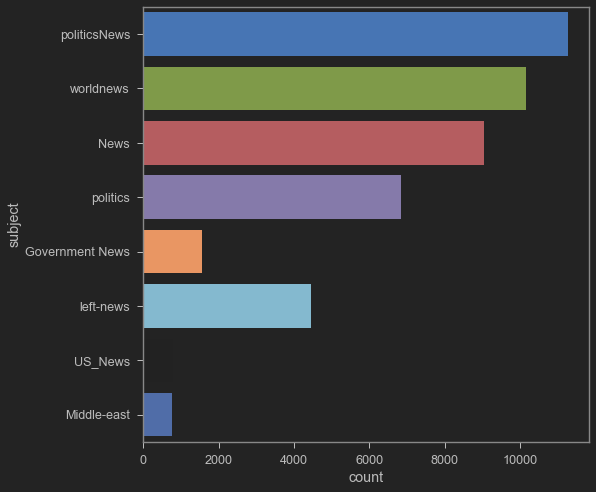

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(y = "subject", data = df_concat)

<AxesSubplot:xlabel='count', ylabel='isfake'>

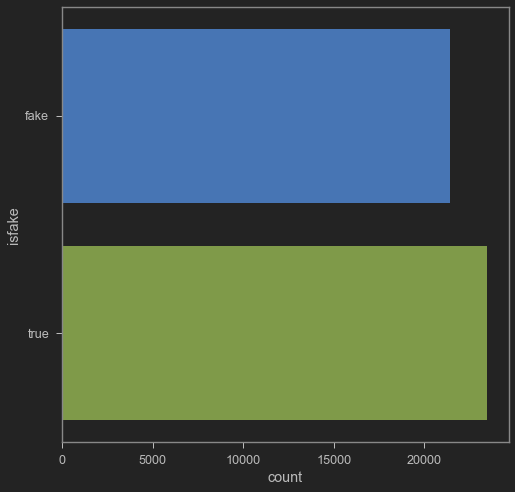

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(y = "isfake", data = df_concat)

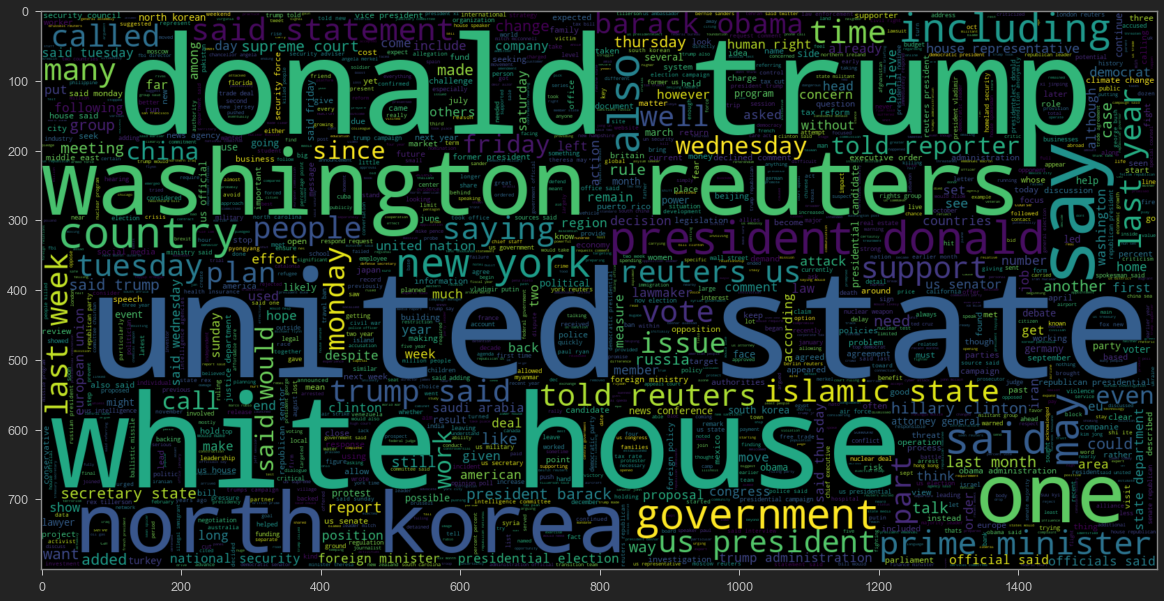

In [34]:
# plot the word cloud for text that is fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords).generate(" ".join(df_concat[df_concat.isfake == 'fake'].cleaned_text))
plt.imshow(wc, interpolation = 'bilinear')

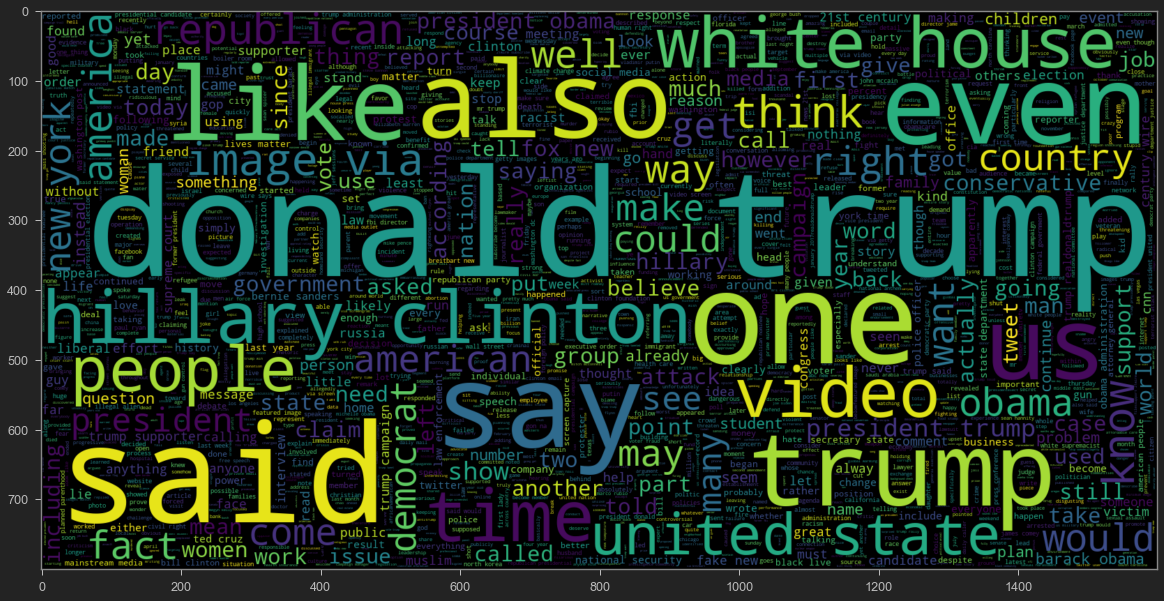

In [35]:
# plot the word cloud for text that is true
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords).generate(" ".join(df_concat[df_concat.isfake == 'true'].cleaned_text))
plt.imshow(wc, interpolation = 'bilinear')

# Running Text Vectorization 

In [36]:
X = df_concat['cleaned_text'].values

y = df_concat['isfake'].values

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize our vectorizer
vectorizer = TfidfVectorizer()

In [38]:
vectorizer.fit(X)

TfidfVectorizer()

In [39]:
X = vectorizer.transform(X)

In [40]:
print(X.shape, type(X))

(44898, 231274) <class 'scipy.sparse.csr.csr_matrix'>


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state = 42)

In [42]:
model = MultinomialNB(alpha = .05)

In [43]:
model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred_proba = model.predict_proba(X_test)

In [46]:
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.958686


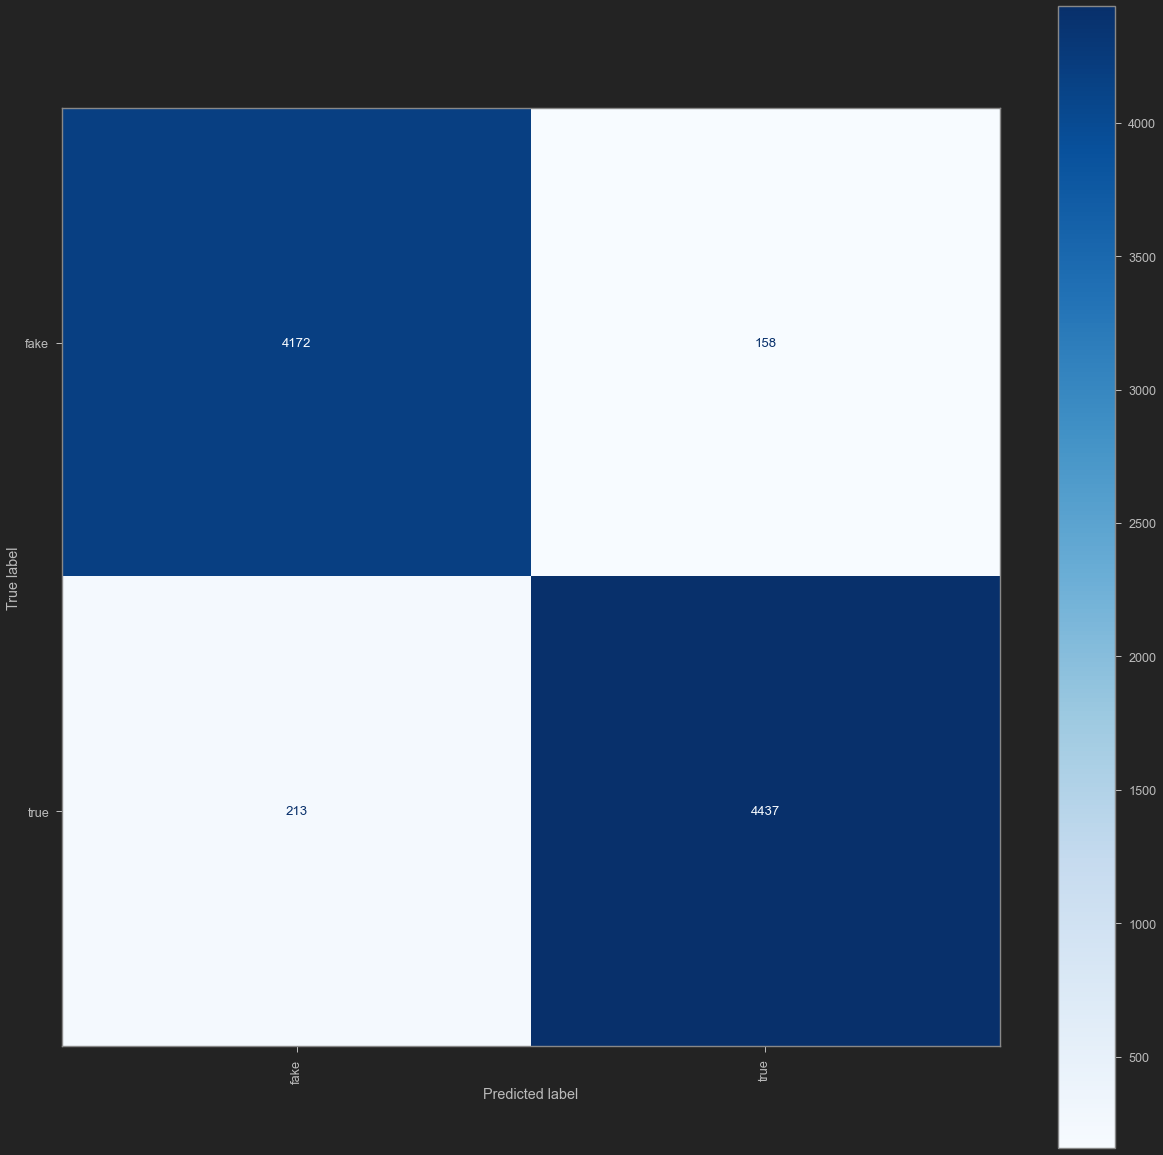

In [47]:
fig, ax = plt.subplots(figsize = (21, 21))

disp = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_,
                            cmap=plt.cm.Blues, ax = ax)

plt.xticks(rotation = 90)
disp

In [48]:
df_concat.shape

(44898, 6)

In [49]:
df_concat.isnull().sum()

title           0
text            0
subject         0
isfake          0
original        0
cleaned_text    0
dtype: int64

In [50]:
df_concat.duplicated().sum()

213

In [51]:
df_concat = df_concat.drop_duplicates()

In [52]:
df_concat.duplicated().sum()

0

In [53]:
df_concat

,title,text,subject,isfake,original,cleaned_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,fake,"As U.S. budget fight looms, Republicans flip t...",us budget fight looms republicans flip fiscal ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,fake,U.S. military to accept transgender recruits o...,us military accept transgender recruits monday...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,fake,Senior U.S. Republican senator: 'Let Mr. Muell...,senior us republican senator let mr mueller jo...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,fake,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,fake,Trump wants Postal Service to charge 'much mor...,trump wants postal service charge much amazon ...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,true,McPain: John McCain Furious That Iran Treated ...,mcpain john mccain furious iran treated us sai...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,true,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,justice yahoo settles email privacy classactio...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,true,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,sunnistan us allied safe zone plan take territ...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,true,How to Blow $700 Million: Al Jazeera America F...,blow 700 million al jazeera america finally ca...


In [54]:
fakeCheck = 'isfake'
text = 'original'
clean_text = 'cleaned_text'

df_concat[fakeCheck].value_counts()

true    23477
fake    21208
Name: isfake, dtype: int64

In [55]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.958686


In [56]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

        fake       0.95      0.96      0.96      4330
        true       0.97      0.95      0.96      4650

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



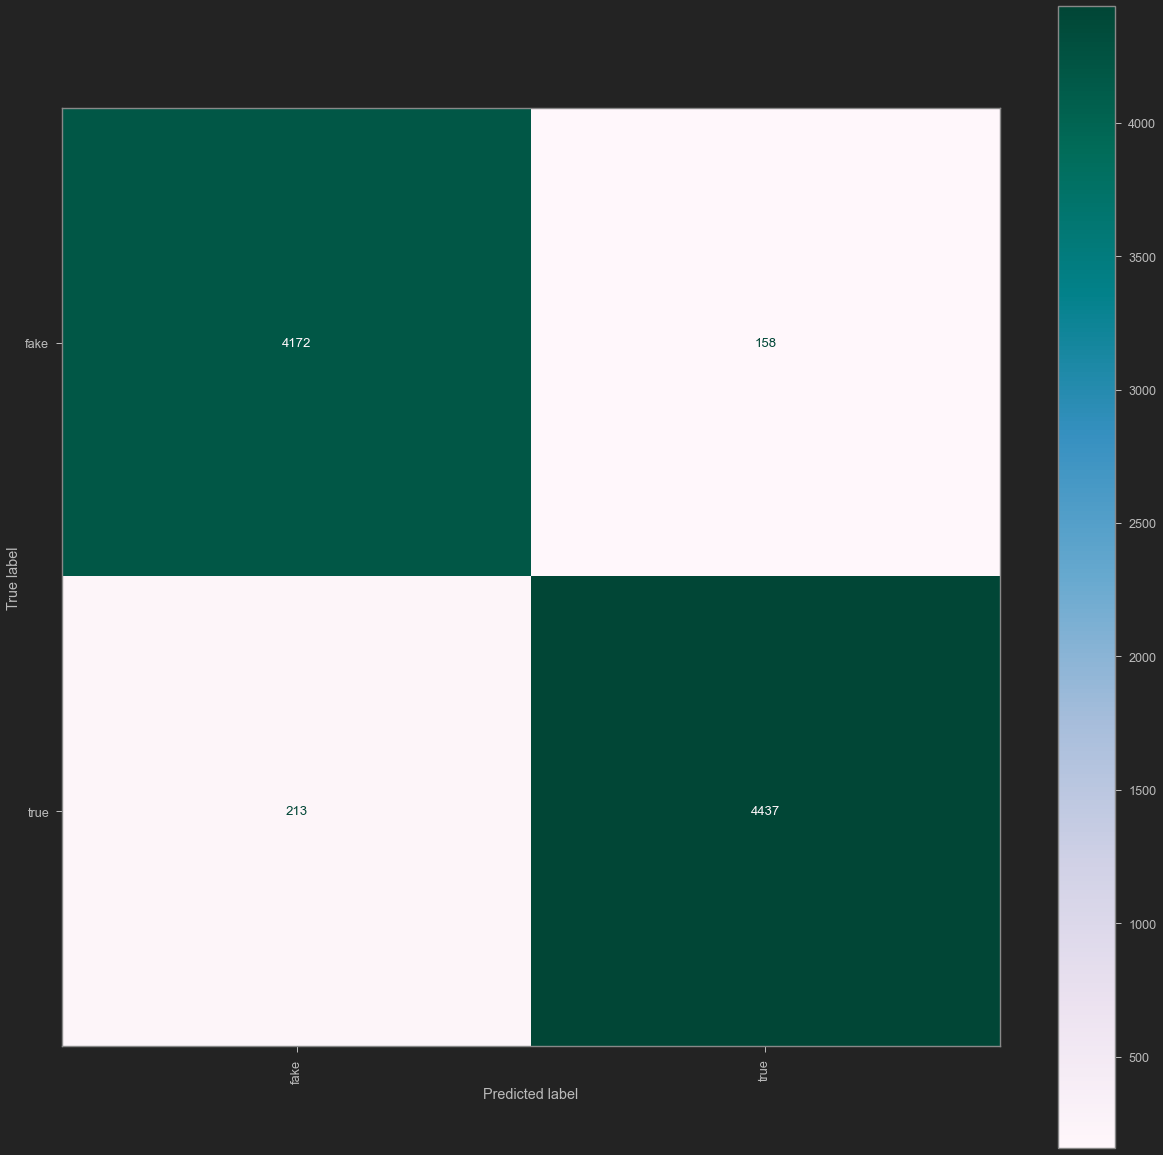

In [57]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.PuBuGn, ax=ax)
plt.xticks(rotation=90)
disp

In [64]:
new_articles = ['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. ', 'Republicans start to relent: It looks like it will be President Biden',
            'vote now',
            'At the time, Lundestad faced a backlash from the committee for breaking with tradition to discuss the procedures that go into choosing a Nobel Prize winner, a usually secretive process. ',
            'The Justice Department has asked a federal judge to drop drug trafficking and corruption charges against a former Mexican defense minister to allow Mexican officials to investigate him, Attorney General William P. Barr announced Tuesday in an abrupt reversal a month after the official was arrested in Los Angeles.The official, Gen. Salvador Cienfuegos Zepeda, had been Mexico’s defense minister from 2012 to 2018 and was accused of taking bribes in exchange for protecting cartel leaders. But Mr. Barr and Mexico’s attorney general, Alejandro Gertz Manero, stopped short in a statement of promising any charges in Mexico, and the move raised questions about why the Justice Department would hand over the matter to a country with a shoddy record of investigating high-profile cases tied to organized crime.In a court filing, prosecutors acknowledged that the Trump administration had determined that preserving its relationship with Mexico prevailed over pursuing the case. “The United States has determined that sensitive and important foreign policy considerations outweigh the government’s interest in pursuing the prosecution of the defendant, under the totality of the circumstances, and therefore require dismissal of the case,” they wrote in asking a judge to dismiss the charges.In an unusual move, the judge, Carol B. Amon of the United States District Court in Brooklyn, ordered the acting United States attorney there, Seth DuCharme, to personally appear before her at a hearing on Wednesday.The Trump administration had taken an aggressive posture toward fighting organized crime and drugs from Mexico in recent years, persuading the authorities there to hand over dozens of suspects — many tied to the drug trade — to stand trial in the United States.But the decision by American officials to arrest a former defense minister had rattled relations between the countries. It was the first time a high-ranking military leader had been detained on American soil on charges of drug-related corruption.',
            'omar has a faction that is the head of a conservative republican party who voted this us congress learned at the end of last month for a huge expansion',
            'The head of a conservative Republican faction in the U.S. Congress, who vote',
           '(CNN)When President Donald Trump learned at the end of last week that his lawyers were dropping their lawsuit seeking a review of ballots in Arizona, the news caught him by surprise.',
           'Summoning members of his team to the Oval Office, where he has been spending afternoons and evenings lately when not in the adjoining dining room watching television, Trump demanded to know why it appeared he was giving up a battle he fully intends to continue waging. Even as his legal pathway to challenging Joe Bidens electoral victory becomes thinner by the day -- and as some of his senior-most aides begin signaling publicly that Biden will take office in January -- Trump has shown little indication he plans to back off his false claim that he won the election. Instead of an actual attempt to locate more votes or even to reverse the election results, Trumps legal efforts appear designed instead to seed conspiracy theories among his conservative supporters, raise additional money, preserve power over the Republican Party and cast a pall of illegitimacy over Bidens tenure -- the same shadow Trump has long complained darkened his own time in office.','The rate of rejected Mail-In Ballots is 30 X’s lower in Pennsylvania this year than it was in 2016. This is why they kept our poll watchers and observers out of the “SACRED” vote counting rooms!',
           'The FDA is expected to release two separate assessments of the trial data before a panel of experts meets to review the data and either approve Pfizer’s request for emergency approval, or deny it. This also comes after the FDA warned of a “severe averse reaction” frequently seen in patients after taking the second dose. In the US, there has been at least one other trial participant who reportedly died not long after receiving the second dose. The participant in that case was a priest in Philadelphia who participated in the Moderna trial. In the UK, two patients were seriously sickened during the trial of the AstraZeneca-Oxford vaccine (though Oxford later said the illnesses had nothing to do with the trial). While In Brazil, authorities briefly halted a trial of Sinovac’s experimental COVID vaccine after a participant died.',
           'Kellyanne Conway, former adviser and White House counselor to President Trump, acknowledged Joe Biden as the apparent winner of the presidential race in an interview that aired Friday. If you look at the vote totals in the Electoral College tally, it looks like Joe Biden and Kamala Harris will prevail,” Conway said in an interview with The 19th. “I assume the electors will certify that and it will be official. We, as a nation, will move forward, because we always do."

Conway, Trump’s former 2016 campaign manager, acknowledged that the president is continuing to “exhaust all of his legal avenues” to challenge the results and said it was his right to do so.

But she also emphasized the need to have a peaceful transition of power, noting the General Services Administration’s decision last week to recognize Biden as the winner so that the transition could formally begin. Trump signaled his own approval of the move last week and also signed off on Biden receiving the President’s Daily Brief, a classified intelligence report delivered to the president on a daily basis.

“We want the engines of government to keep going,” Conway said.

Her public comments are notable because many of Trump’s allies have not acknowledged Biden's victory as the president has challenged the results. Trump has repeated wild and baseless allegations about widespread voter fraud in the election and falsely claimed that he won states that he lost to Biden.

George Conway: 'Biggest election fraud of 2020' is lie Trump won
Trump taps Conway, Chao to government posts in waning days of...
The Trump campaign has not produced evidence to back up his claims and its lawsuits have largely failed so far. Biden was projected the winner of the presidential race almost a month ago, and swing states where the president has mounted legal challenges have certified results showing a Biden win.

Conway’s remarks come after Attorney General William Barr told The Associated Press this week that the Justice Department has not found evidence of widespread voter fraud that would overturn the results of the election. Trump expressed disappointment with Barr’s comments on Thursday, insisting that the election was “rigged” against him.

Conway was one of Trump’s longest serving advisers in the White House. She left her role as White House counselor at the end of August, saying she wanted to focus on family matters.']

for article in new_articles:
    article=text_pipeline(article)
    X=vectorizer.transform([article])
    x_pred=model.predict(X)
    print(article,'=',x_pred)

SyntaxError: EOL while scanning string literal (<ipython-input-64-84465fd76b57>, line 10)